In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib notebook

<IPython.core.display.Javascript object>


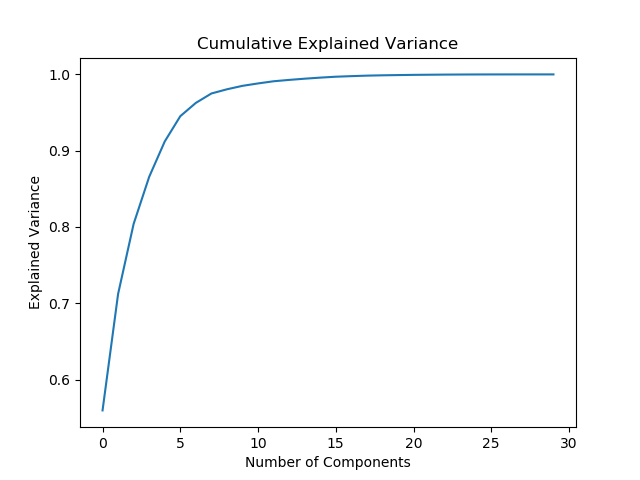

In [17]:
raw = pd.read_excel('./raw.xlsx', sheet_name='Batting')

x = raw.loc[:, raw.columns != 'W-L%']
x = x.loc[:, x.columns != 'Tm']
y = raw['W-L%']

pca = PCA(n_components=len(x))
pca.fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance')

plt.show()

In [18]:
principleComponents = pca.fit_transform(x.values)
principleDf = pd.DataFrame(data = principleComponents
             , columns = ['principle component 1', 'principle component 2'])

finalDf = pd.concat([principleDf, raw[['W-L%']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principle Component 1', fontsize = 15)
ax.set_ylabel('principle Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['W-L%'] == target
    ax.scatter(finalDf.loc[:, 'principle component 1']
               , finalDf.loc[:, 'principle component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ValueError: Shape of passed values is (30, 30), indices imply (30, 2)